# EllaBot Report

Introduction
------------

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc sodales porta molestie. Suspendisse a nisi interdum, commodo arcu a, congue ligula. Suspendisse potenti. Duis sollicitudin nulla odio, eu fermentum dui molestie ut. Vestibulum ac odio vehicula, feugiat purus sit amet, congue lectus. Suspendisse ultricies odio suscipit est lobortis, vitae suscipit justo iaculis. Sed ut nunc tellus. Aliquam efficitur dictum eros, id rhoncus turpis placerat at.

In [21]:
%matplotlib inline
from worldsim import WorldSim
from worldsim.agents import SarsaAgent, State
from worldsim.tasks import SearchTask
from random import random
import matplotlib.pyplot as plt

Let's initialize the world, agent, and task.

In [22]:
task = SearchTask(5.0, 5.0)
world = WorldSim(10.0, 10.0, 0.0, 0.0, task)
agent = SarsaAgent(world, task)
world.agent = agent

Let's run an experiment, with one hundred episodes.

Here's some $\LaTeX$ because I can.

In [23]:
tasksolved = False
episode_rewards = []
for i in range(100):
    while tasksolved is False:
        agent.act()
        agent_state = agent.getstate()
        tasksolved = world.task.stateisfinal(agent_state)
    
    episode_rewards.append(agent.episode_reward)
    agent.episode_reward = 0
    world.reset()
    task.target_x = random() * world.width
    task.target_y = random() * world.height
    tasksolved = False

Plotting the results is easy!

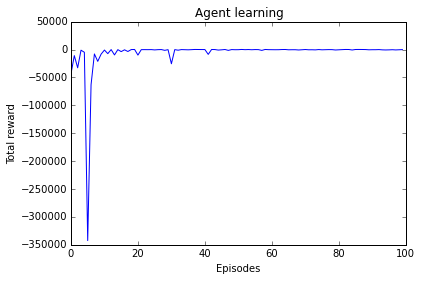

In [24]:
x = [x for x in range(len(episode_rewards))]
y = episode_rewards
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title('Agent learning')
plt.plot(x, y, 'b')